Reading file: stats/grainyhead_mondo_2020.tsv
Reading file: stats/grainyhead_mondo_2021.tsv
Reading file: stats/grainyhead_mondo_2023.tsv
Reading file: stats/grainyhead_mondo_2022.tsv
Reading file: stats/grainyhead_mondo_2024.tsv


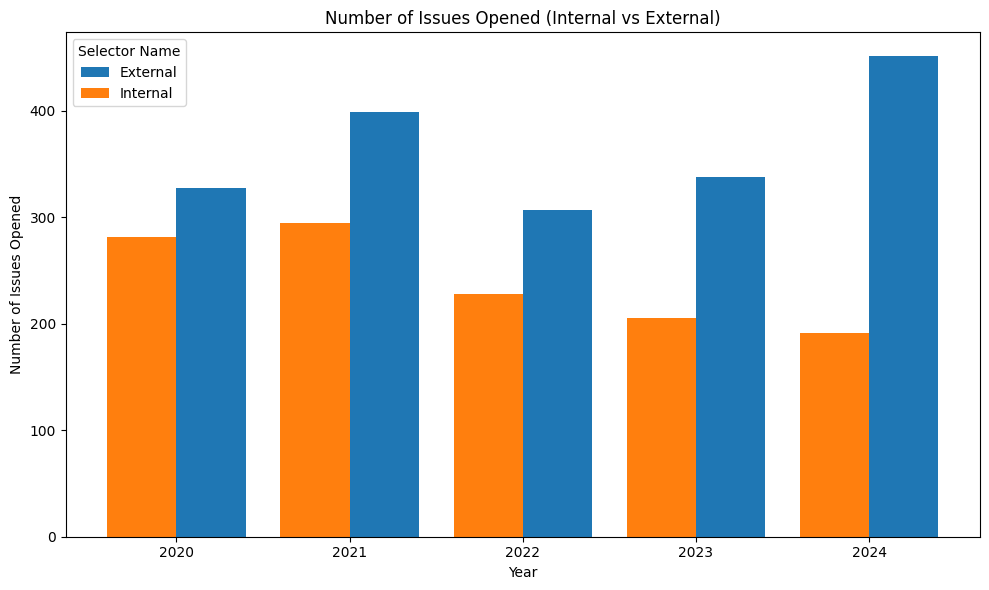

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Path to the TSV files
file_pattern = "stats/grainyhead_mondo_*.tsv"

# Collect all files matching the pattern
files = glob.glob(file_pattern)

# Initialize an empty list to store DataFrames
data_frames = []

# Iterate through the files and read them into pandas DataFrames
for file in files:
    print(f"Reading file: {file}")
    # Extract the year from the filename
    year = file.split('_')[-1].split('.')[0]
    
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file, sep="\t")
    
    # Add a 'Year' column to the DataFrame
    df['Year'] = int(year)
    
    # Append the DataFrame to the list
    data_frames.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(data_frames, ignore_index=True)



In [ ]:
# Filter the data for "Issues opened" and exclude the "Total" row
issues_opened_df = combined_df[
    (combined_df['Selector name'].isin(['Internal', 'External'])) & 
    (combined_df['Selector'] != 'all')
]

# Keep only relevant columns for plotting
issues_opened_df = issues_opened_df[['Year', 'Selector name', 'Issues opened']]

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
for selector_name, group in issues_opened_df.groupby('Selector name'):
    plt.bar(group['Year'] - 0.2 if selector_name == "Internal" else group['Year'] + 0.2,
            group['Issues opened'], 
            width=0.4, 
            label=selector_name)

# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Number of Issues Opened')
plt.title('Number of Issues Opened (Internal vs External)')
plt.xticks(sorted(issues_opened_df['Year'].unique()))
plt.legend(title='Selector Name')
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/vj/ks1_0k8x3t9ftrwcr0t9vjwr0000gn/T/ipykernel_23358/2778251759.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Total'] = filtered_df[features].sum(axis=1)


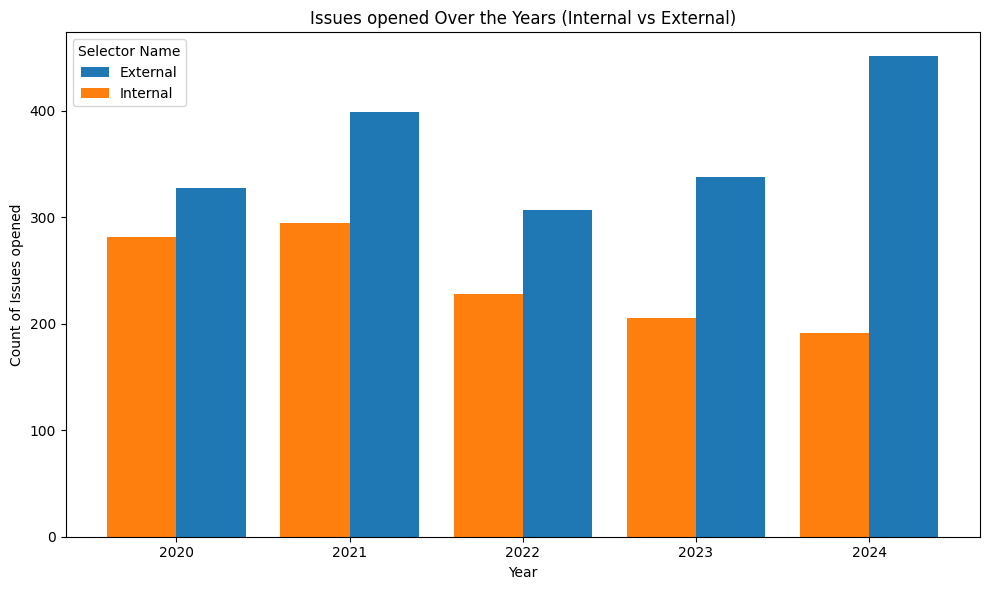

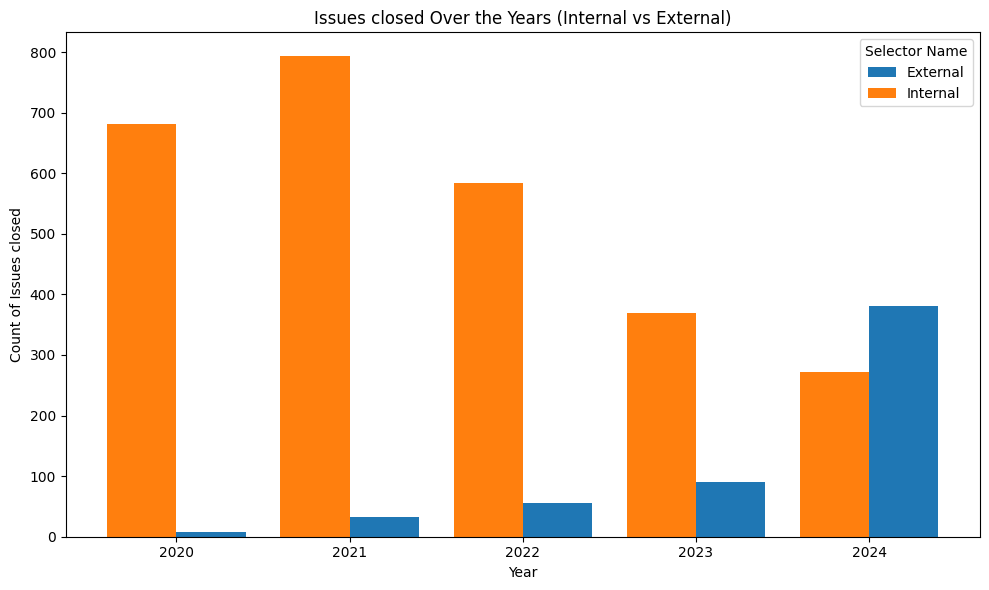

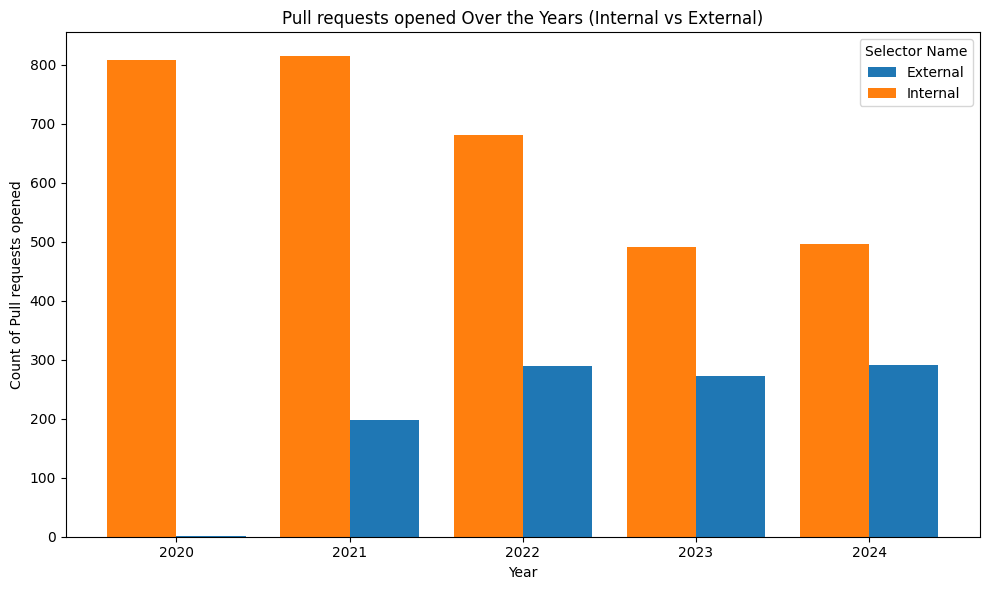

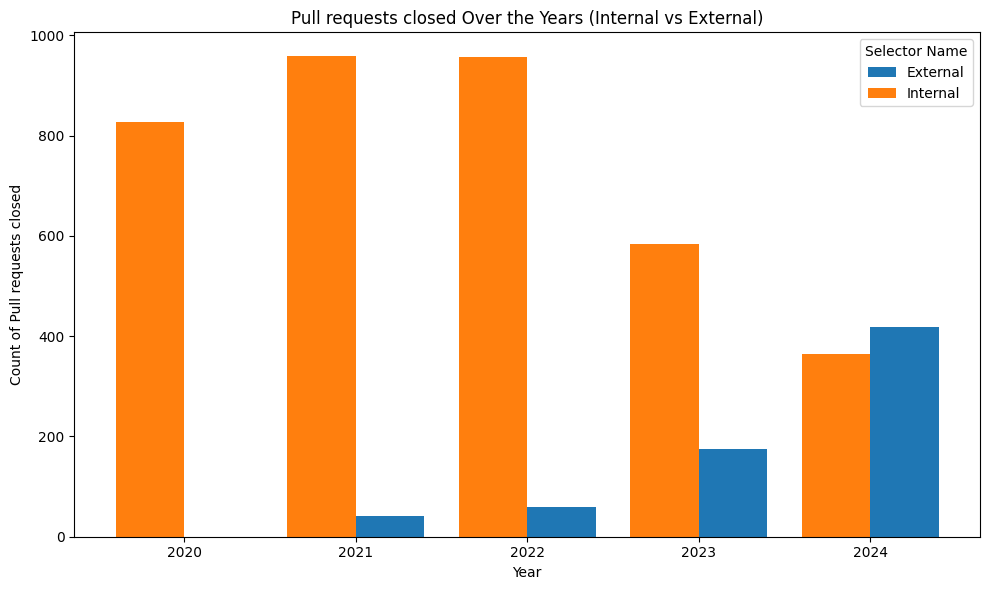

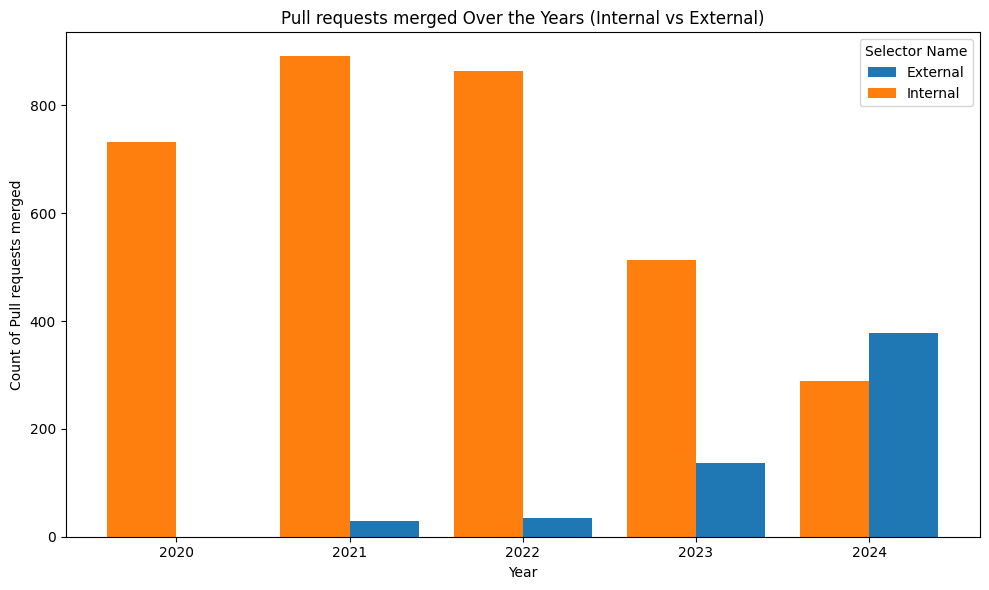

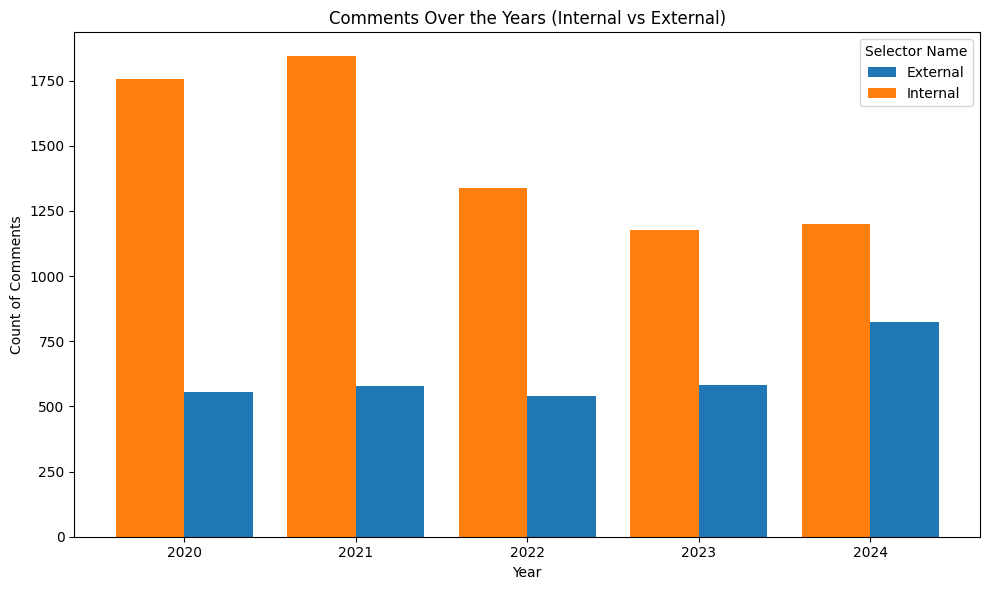

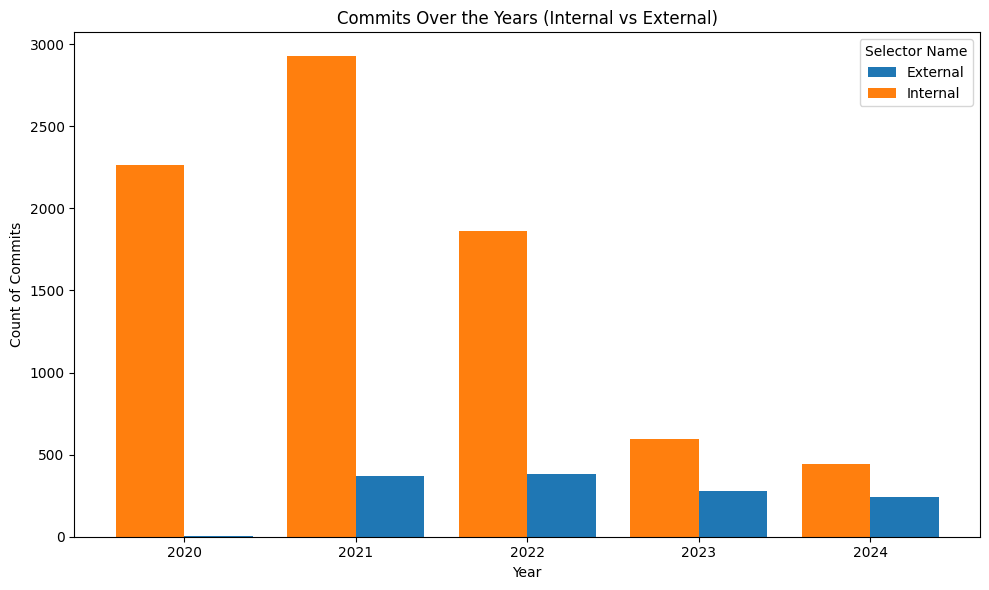

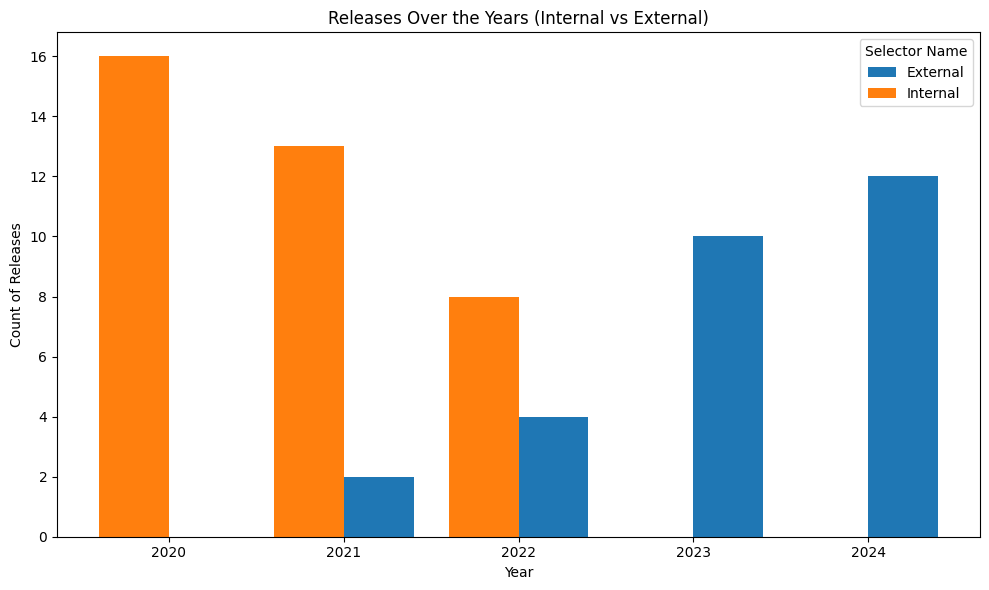

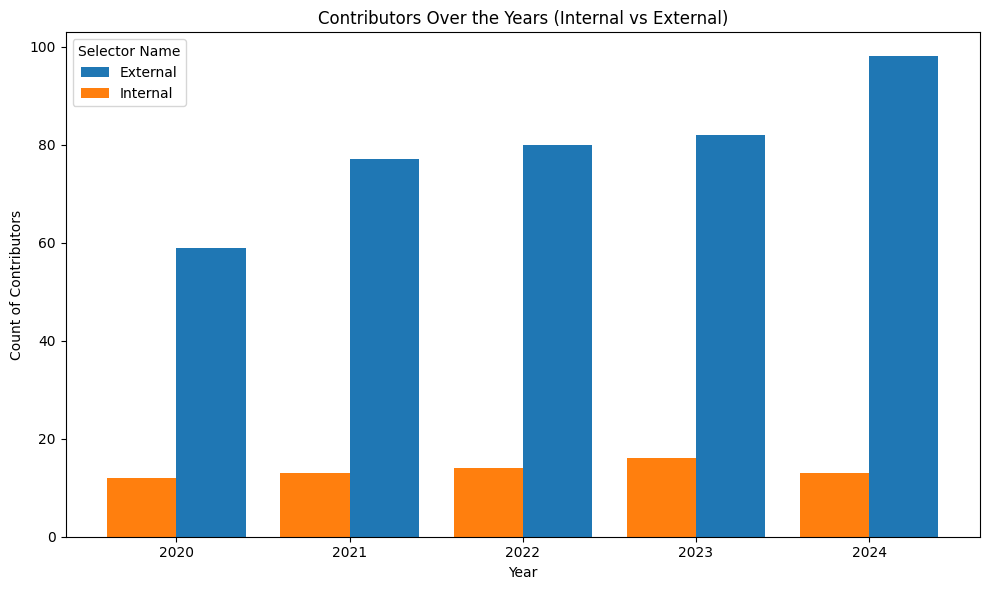

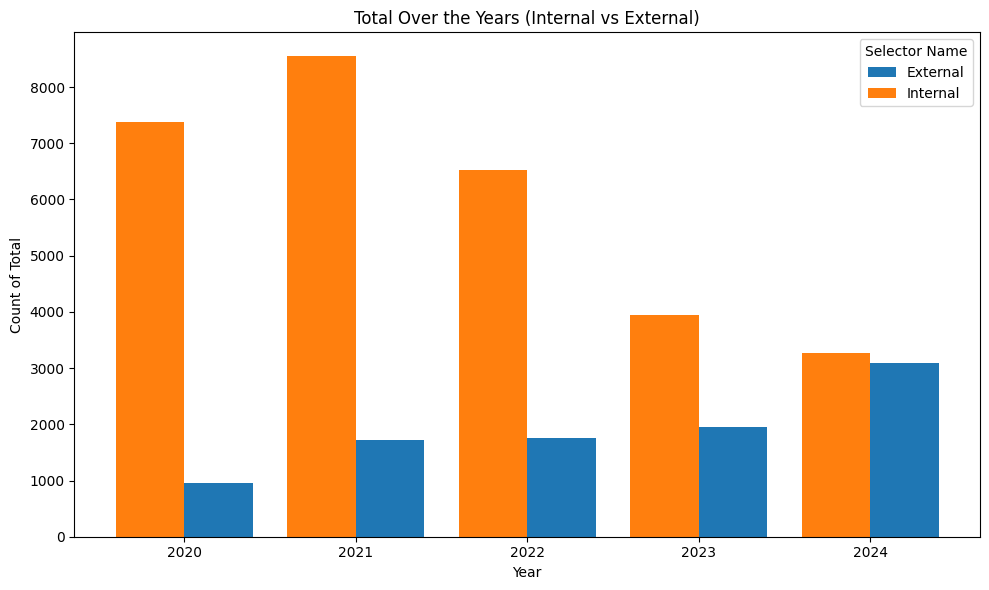

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Path to the TSV files
file_pattern = "stats/grainyhead_mondo_*.tsv"

# Collect all files matching the pattern
files = glob.glob(file_pattern)

# Initialize an empty list to store DataFrames
data_frames = []

# Iterate through the files and read them into pandas DataFrames
for file in files:
    # Extract the year from the filename
    year = file.split('_')[-1].split('.')[0]
    
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file, sep="\t")
    
    # Add a 'Year' column to the DataFrame
    df['Year'] = int(year)
    
    # Append the DataFrame to the list
    data_frames.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(data_frames, ignore_index=True)

# Features to include in the analysis
features = [
    "Issues opened", "Issues closed", "Pull requests opened", 
    "Pull requests closed", "Pull requests merged", 
    "Comments", "Commits", "Releases", "Contributors"
]

# Filter the data for "Internal" and "External", excluding "Total"
filtered_df = combined_df[
    (combined_df['Selector name'].isin(['Internal', 'External'])) & 
    (combined_df['Selector'] != 'all')
]

# Add a "Total" column summing all features
filtered_df['Total'] = filtered_df[features].sum(axis=1)

# Melt the DataFrame to reshape it for grouped bar plot
melted_df = filtered_df.melt(
    id_vars=['Year', 'Selector name'], 
    value_vars=features + ['Total'], 
    var_name='Feature', 
    value_name='Count'
)

# Plot grouped bar plots for all features
for feature in features + ['Total']:
    plt.figure(figsize=(10, 6))
    subset = melted_df[melted_df['Feature'] == feature]
    for selector_name, group in subset.groupby('Selector name'):
        plt.bar(group['Year'] - 0.2 if selector_name == "Internal" else group['Year'] + 0.2,
                group['Count'], 
                width=0.4, 
                label=selector_name)

    # Add labels, legend, and title
    plt.xlabel('Year')
    plt.ylabel(f'Count of {feature}')
    plt.title(f'{feature} Over the Years (Internal vs External)')
    plt.xticks(sorted(subset['Year'].unique()))
    plt.legend(title='Selector Name')
    plt.tight_layout()

    # Show the plot
    plt.show()
